In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pokemon_df = pd.read_csv("/content/Pokemon.csv")

pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


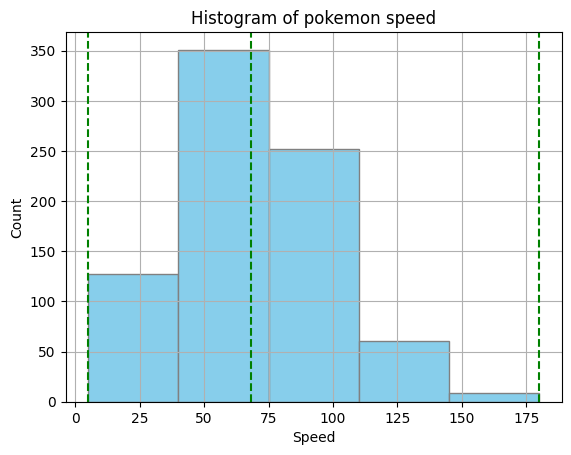

In [ ]:
#histogram for column "speed"

pokemon_df['Speed'].hist(bins=5, color='skyblue', edgecolor = "gray")
plt.xlabel('Speed')
plt.ylabel('Count')
plt.title('Histogram of pokemon speed')

#Avg line
plt.axvline(pokemon_df['Speed'].mean(), linestyle='dashed', color='green')
#Min line
plt.axvline(pokemon_df['Speed'].min(), linestyle = 'dashed', color='green')
#Max line
plt.axvline(pokemon_df['Speed'].max(), linestyle = 'dashed', color='green')
plt.show()


**CORRELATION**

<function matplotlib.pyplot.show(close=None, block=None)>

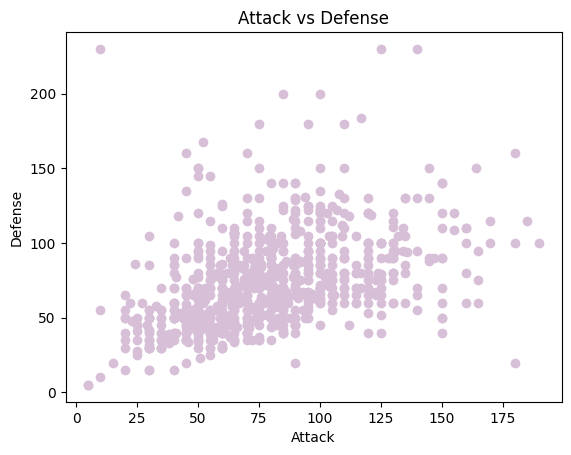

In [ ]:
#scatter plot between Attack and Defense
plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color='thistle')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs Defense')
plt.show

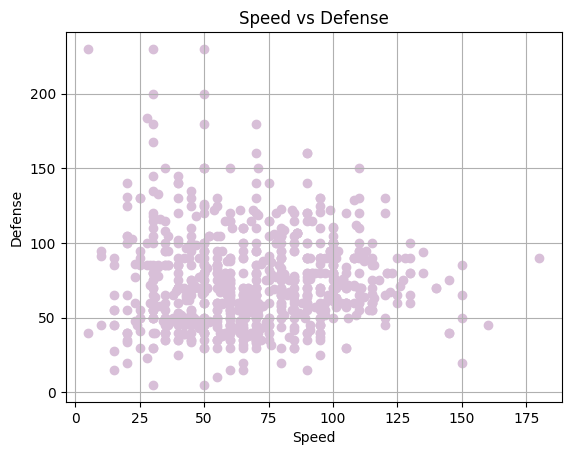

In [ ]:
#scatterplot for speed and defense
plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color='thistle')
plt.ylabel('Defense')
plt.title('Speed vs Defense')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Defense')

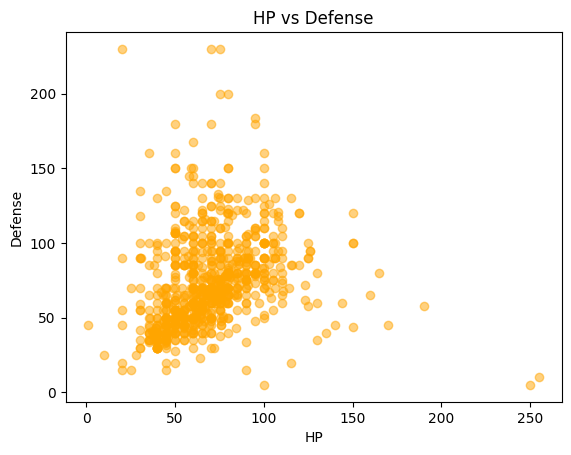

In [ ]:
#scatter plot HP and defense
plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color='orange', alpha=0.5)
plt.title('HP vs Defense')
plt.xlabel('HP')
plt.ylabel('Defense')

**Pearson correlation**

relationship between 2 variables

-1 is negative,
1 is perfect positive correlation

Weak Correlation: 0 to ±0.3
Moderate Correlation: ±0.3 to ±0.7
Strong Correlation: ±0.7 to ±1

In [ ]:
#Pearson correlation between attack and defense

attack_defense_corr = pokemon_df['Attack'].corr(pokemon_df['Defense'])
print(attack_defense_corr) #0.4386870551184892

#Perason correlation between speed and defense
speed_defense_corr = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print(speed_defense_corr) #0.015226598088597448

0.4386870551184892
0.015226598088597448


In [ ]:
#select only numeric columns
numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns.drop(columns=['#'], inplace=True)
numeric_columns.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [ ]:
target_column = "Attack"

#correlation between this column and other columns

for column in numeric_columns.columns:
    if column != target_column:
        correlation = numeric_columns[column].corr(numeric_columns[target_column])
        print(f"Correlation between {column} and {target_column}: {correlation}")

#save the data in dictionary
#key = value, val = Pearson corr
        correlation_results[col] = correlation

Correlation between Total and Attack: 0.7362106519949293
Correlation between HP and Attack: 0.422386028776223
Correlation between Defense and Attack: 0.4386870551184892
Correlation between Sp. Atk and Attack: 0.39636175534923196
Correlation between Sp. Def and Attack: 0.26398955110108846
Correlation between Speed and Attack: 0.38123973924108967
Correlation between Generation and Attack: 0.051451336708469686


**Correlation matrix**

In [ ]:
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


Visualising with Seaborn library

In [ ]:
import seaborn as sns

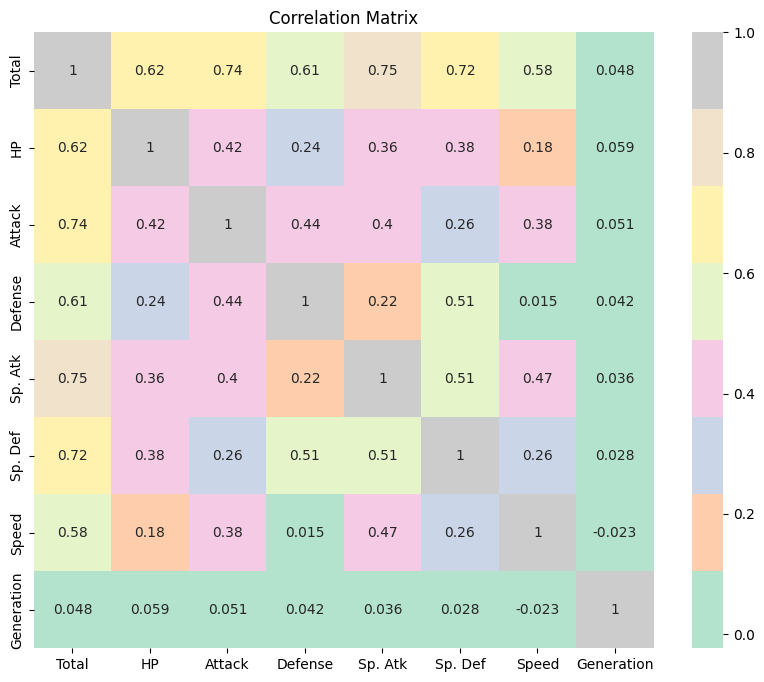

In [ ]:
plt.figure(figsize=(10, 8)) #increase figure using matplotlib

sns.heatmap(correlation_matrix, annot=True, cmap="Pastel2") #annot = adding values
plt.title("Correlation Matrix")
plt.show()

Linear regression

(predict one value based on another)

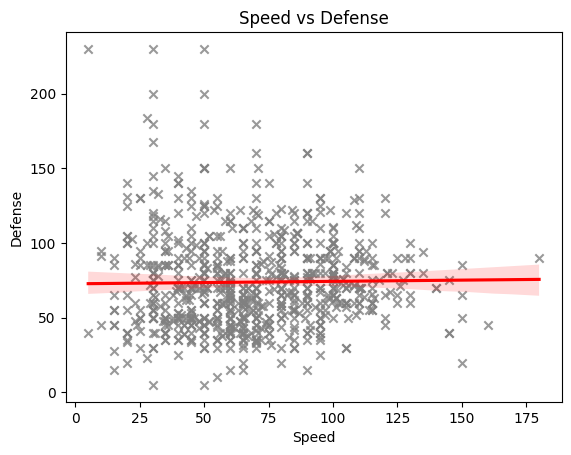

Pearson correlation coefficient: 0.015226598088597448


In [ ]:
sns.regplot(x='Speed', y='Defense', data=pokemon_df, color='gray', ci=99, marker='x', line_kws={'color':'red'})
plt.title('Speed vs Defense')
plt.show()

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)

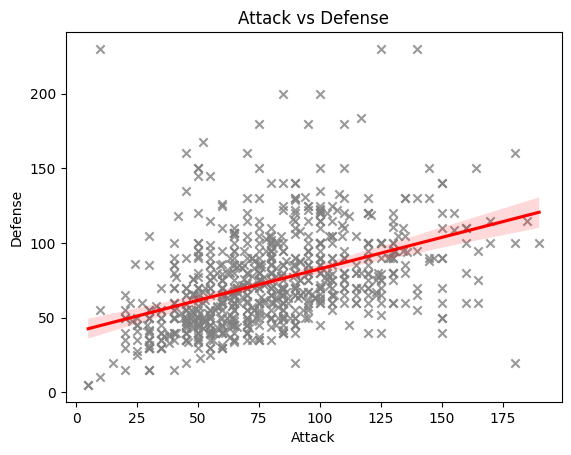

Pearson correlation coefficient: 0.4386870551184892


In [ ]:
#attack vs defense

sns.regplot(x="Attack", y="Defense", data=pokemon_df, color="gray", ci=99, marker="x", line_kws={"color":"red"})
plt.title("Attack vs Defense")
plt.show()

correlation3 = pokemon_df["Attack"].corr(pokemon_df["Defense"])
print("Pearson correlation coefficient:", correlation3)

In [ ]:
#Teamwork
#Task: Visualizing the correlation of Attack and Defense variables of two Types: Grass and Water Type 1 Pokémon.


In [ ]:
#1. Create two DataFrame Grass and Water
grass_df = pokemon_df[pokemon_df["Type 1"] == "Grass"]
water_df = pokemon_df[pokemon_df["Type 1"] == "Water"]

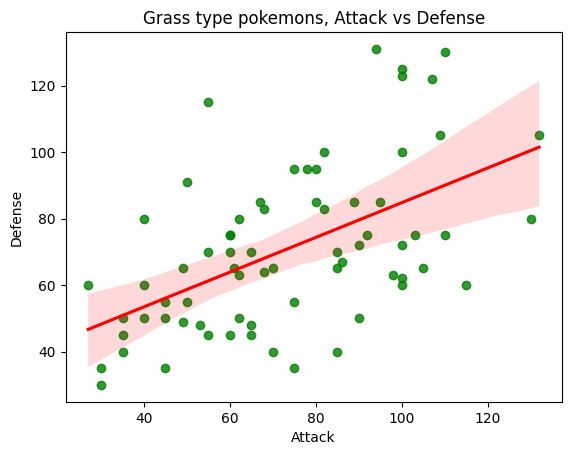

In [ ]:
#2. Create the regression plots for each (Grass and Water)
sns.regplot(x="Attack", y="Defense", data=grass_df, color="green", ci=99, marker="o", line_kws={"color":"red"})
plt.title("Grass type pokemons, Attack vs Defense")
plt.show()

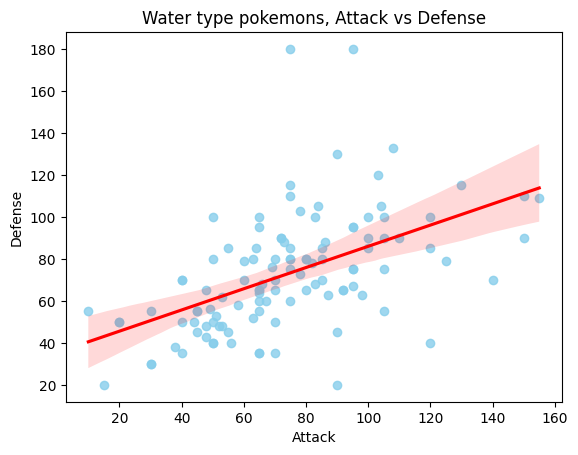

In [ ]:
#2. Create the regression plots for each (Grass and Water)
sns.regplot(x="Attack", y="Defense", data=water_df, color="skyblue", ci=99, marker="o", line_kws={"color":"red"})
plt.title("Water type pokemons, Attack vs Defense")
plt.show()

In [ ]:
#3. Calculate the Pearson correlation for each DataFrame (variables: Attack and Defense)

#for Water type pokemons
correlation4 = water_df["Attack"].corr(water_df["Defense"])
print("Pearson correlation coefficient for Water type pokemons:", correlation4) #0.5161628601933552

#for Grass type pokemons
correlation5 = grass_df["Attack"].corr(grass_df["Defense"])
print("Pearson correlation coefficient for Grass type pokemons:", correlation5) #0.5407436570609248

Pearson correlation coefficient for Water type pokemons: 0.5161628601933552
Pearson correlation coefficient for Grass type pokemons: 0.5407436570609248


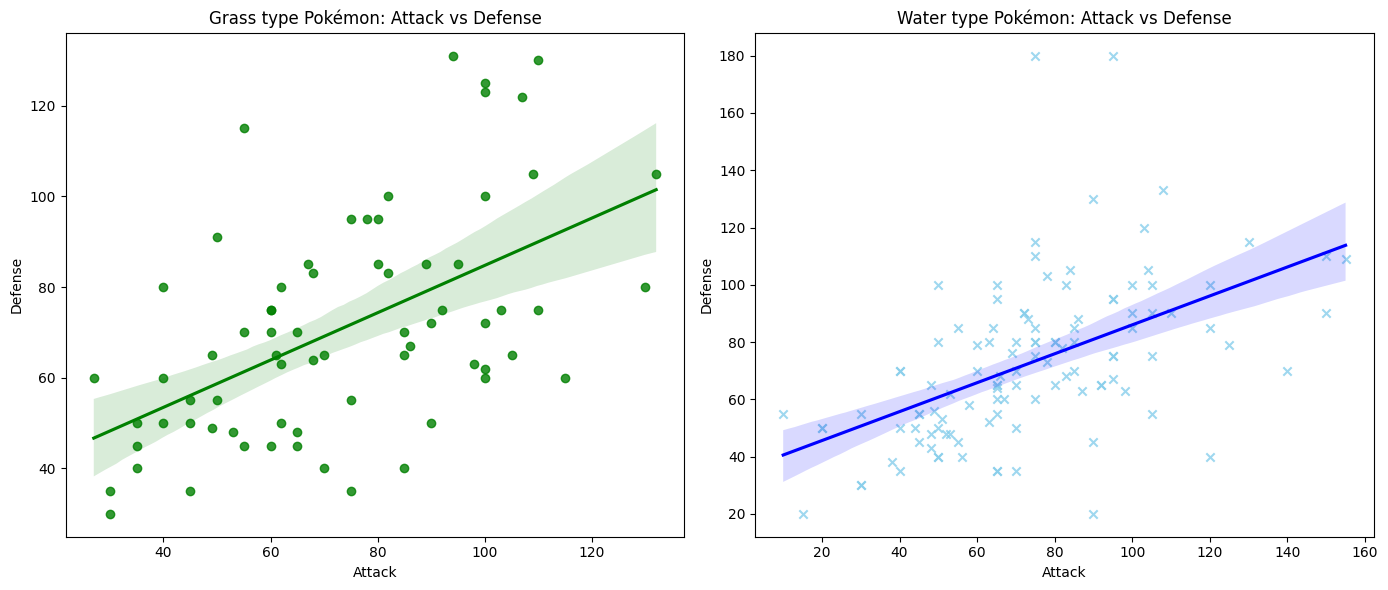

In [ ]:
plt.figure(figsize=(14, 6))

#Grass type
plt.subplot(1, 2, 1)
sns.regplot(x="Attack", y="Defense", data=grass_df, color="green", marker="o", line_kws={"color":"green"})
plt.title("Grass type pokemon: Attack vs Defense")
plt.xlabel("Attack")
plt.ylabel("Defense")

#Water type
plt.subplot(1, 2, 2)
sns.regplot(x="Attack", y="Defense", data=water_df, color="skyblue", marker="x", line_kws={"color":"blue"})
plt.title("Water type pokemon: Attack vs Defense")
plt.xlabel("Attack")
plt.ylabel("Defense")

plt.tight_layout()
plt.show()


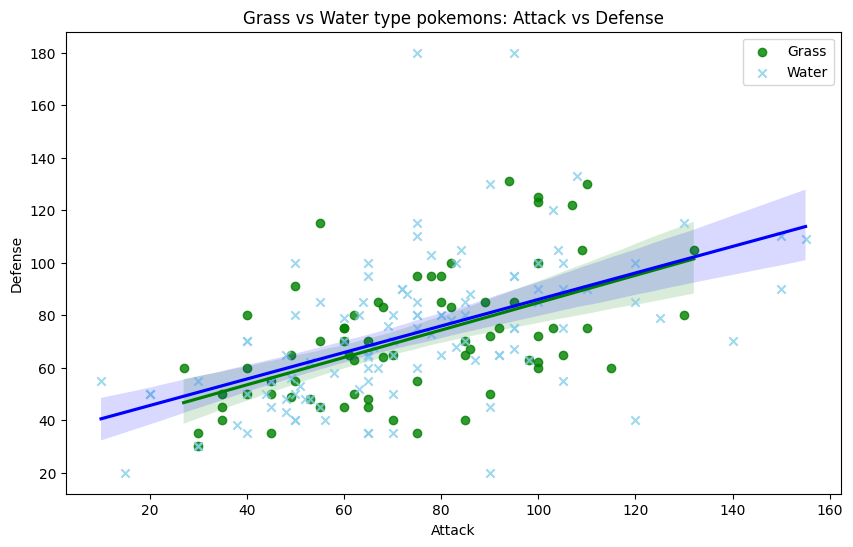

In [ ]:
plt.figure(figsize=(10, 6))

#Grass type
sns.regplot(x="Attack", y="Defense", data=grass_df, color="green", marker="o", label="Grass", line_kws={"color":"green"})
#Water type
sns.regplot(x="Attack", y="Defense", data=water_df, color="skyblue", marker="x", label="Water", line_kws={"color":"blue"})

plt.title("Grass vs Water type pokemons: Attack vs Defense")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.show()